In [1]:
import pandas as pd

In [2]:
link='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
data=pd.read_csv(link, names=['age','workclass','fnlwgt','education',\
                              'education-num','marital-status','occupation',\
                              'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', '50K'])

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### 1. HOW MANY MALES AND FEMALES ARE THERE?

In [16]:
data.groupby(by='sex').count().iloc[:, 0]

sex
 Female    10771
 Male      21790
Name: age, dtype: int64

### 2. WHAT IS THE MEAN MALE AGE?

In [20]:
data.groupby(by='sex').mean()[['age']].iloc[1]

age    39.433547
Name:  Male, dtype: float64

### 3. WHAT IS THE PROPORTION OF US CITIZENS?

In [38]:
(data.groupby(by='native-country').count()/data.count()).loc[' United-States'][0]

0.895857006848684

### 4. Plot the distribution of people’s education as a bar plot.

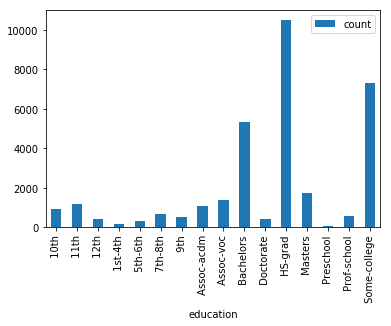

In [47]:
%matplotlib inline
data.groupby(by='education').count()[['age']].rename(index=str, columns={'age':'count'}).plot(kind='bar')

### 5. What is the mean and standard deviation of the ”ﬁnal weight” for divorced people?


In [73]:
data.ix[data['marital-status']==' Divorced'][['fnlwgt']].mean()

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


fnlwgt    185802.790457
dtype: float64

In [74]:
data.ix[data['marital-status']==' Divorced'][['fnlwgt']].std()

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


fnlwgt    105646.789459
dtype: float64

### 6. Is it true that the people who receive over 50k are mostly highly educated?

In [168]:
data.ix[data['50K']==' >50K'].groupby('education-num').count()[['age']].rename(index=str, columns={'age':'count'})
#It is True

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,count
education-num,
2,6
3,16
4,40
5,27
6,62
7,60
8,33
9,1675
10,1387


### 7. What is the maximum male and female age for each race?

In [89]:
data.groupby(by=['race', 'sex']).max()[['age']]

age
race                sex         
 Amer-Indian-Eskimo  Female   80
                     Male     82
 Asian-Pac-Islander  Female   75
                     Male     90
 Black               Female   90
                     Male     90
 Other               Female   74
                     Male     77
 White               Female   90
                     Male     90

### 8. The people from which countries work as farmers/ﬁshers?


In [103]:
data.ix[data['occupation'].isin([' Farming-fishing'])].groupby('native-country').count().index

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Index([' ?', ' Cambodia', ' Canada', ' Cuba', ' El-Salvador', ' England',
       ' France', ' Germany', ' Guatemala', ' Hong', ' Ireland', ' Italy',
       ' Japan', ' Mexico', ' Philippines', ' Poland', ' Portugal',
       ' Puerto-Rico', ' United-States', ' Vietnam', ' Yugoslavia'],
      dtype='object', name='native-country')

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [138]:
data2=data.ix[data['education'].isin([' Bachelors', ' Masters'])].groupby(by=['sex', 'education']).count()[['age']].rename(index=str, columns={'age':'count'})
data3=data2.reset_index()
male_ratio=list(data3.ix[(data3['sex']==' Male') & (data3['education']==' Bachelors')]['count'])[0]/list(data3.ix[(data3['sex']==' Male') & (data3['education']==' Masters')]['count'])[0]
female_ratio=list(data3.ix[(data3['sex']==' Female') & (data3['education']==' Bachelors')]['count'])[0]/list(data3.ix[(data3['sex']==' Female') & (data3['education']==' Masters')]['count'])[0]

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-

In [140]:
if male_ratio > female_ratio:
    print('male')
else:
    print('female')

male


### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [157]:
max_hours=data[['hours-per-week']].sort_values(by='hours-per-week', ascending=False).reset_index()[['hours-per-week']].loc[0][0]

In [160]:
data.ix[data['hours-per-week']==max_hours].count()[0]

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


85

In [166]:
data.ix[data['hours-per-week']==max_hours].groupby('50K').count()['age']

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


50K
 <=50K    60
 >50K     25
Name: age, dtype: int64